## Assignment 1: Machine Learning Methods

### \<Ravi Trivedi> \<a1827896>

#### How can we use data analytics to predict energy usage for this house?

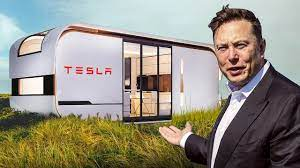


### 1. Read the dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df=pd.read_csv('energydata_complete-1.csv')

df.describe()

#Checking datatypes of each columns
#print(df.dtypes)



,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### 2. Analyse and visualise the data

In [ ]:
The correlation matrix can be used to determine a relationship or dependency between any columns or characteristics that have a high correlation with either the dependent variable or with one another. The correlation coefficient between any two variables is represented by each element of the correlation matrix, which is a square matrix. The diagonal components represent the constant one association between each variable and itself. Because regardless of the sequence, there is always a correlation between two factors.The correlation coefficient ranges from -1 to 1, with values of -1 and 1 designating ideal negative and positive correlations, respectively.  When the numbers are positive, there is a positive correlation between the variables, while when they are negative, there is a negative correlation. 
Based on the realtions between dependent and independent variable we are implmenting Multilinear regression model, Random Forest Regression and Support Vector machine in terms of Classifcation and regression.


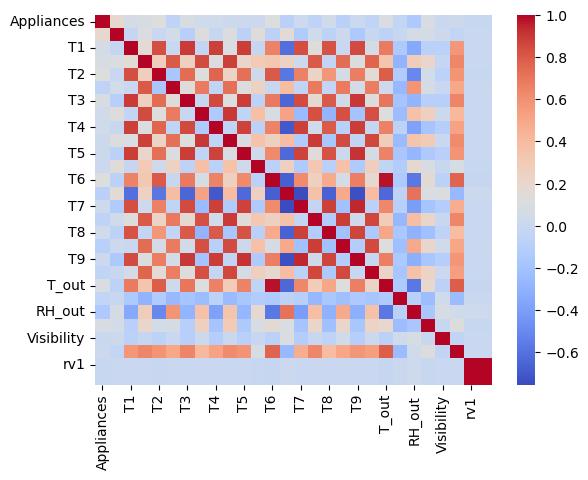

RH_out        -0.152282
RH_8          -0.094039
RH_6          -0.083178
RH_2          -0.060465
RH_7          -0.055642
RH_9          -0.051462
Press_mm_hg   -0.034885
rv1           -0.011145
rv2           -0.011145
Visibility     0.000230
RH_5           0.006955
T9             0.010010
Tdewpoint      0.015353
RH_4           0.016965
T5             0.019760
T7             0.025801
RH_3           0.036292
T8             0.039572
T4             0.040281
T1             0.055447
T3             0.085060
RH_1           0.086031
Windspeed      0.087122
T_out          0.099155
T6             0.117638
T2             0.120073
lights         0.197278
Appliances     1.000000
Name: Appliances, dtype: float64


In [172]:

# Preprocessing
# Dropping the missing value 
#Removing All the Null values 
df = df.dropna()
#Removing unncessary columns from dataframe 
#df=df.drop(columns='date')
#Visualization 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a correlation matrix
corr = df.corr()
# Creating a heatmap
sns.heatmap(corr, cmap='coolwarm')
# Showing the plot
plt.show()
#Identify the strongest relationship between dependent and independent variable
print(corr['Appliances'].sort_values(ascending=False))
#df

In [159]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

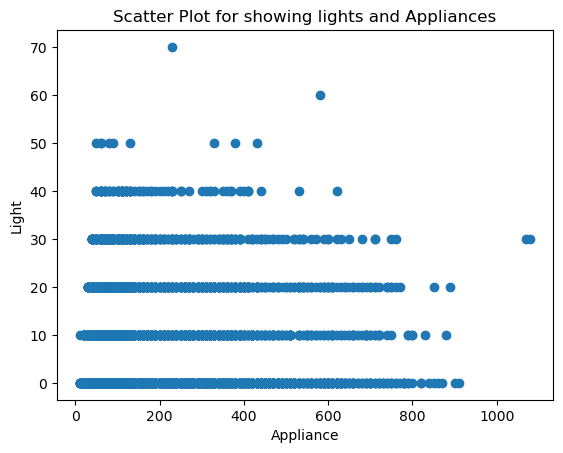

In [174]:
#Visualizing the strongly realted dependent and independent variables according to corelation matrix 
# Create a scatter plot
x = df[['Appliances']]
y= df['lights']
plt.scatter(x, y)
plt.xlabel('Appliance')
plt.ylabel('Light')
plt.title('Scatter Plot for showing lights and Appliances')
plt.show()


### 3. Implement prediction models

In [152]:
#Multi linear regression 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['lights','T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out','Press_mm_hg','Windspeed','Visibility','RH_out','rv1','rv2']]
y = df['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Multi linear Regression Train the training data
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

#Multi linear regression predictions on the testing data 
# y_pred = regressor.predict(X_test)
#Multi linear regression to evaluate Mutli linear regression model
# from sklearn.metrics import mean_squared_error, r2_score

# mse = mean_squared_error(y_test, y_pred)
# r_squared = r2_score(y_test, y_pred)

# print('Mean squared error: ', mse)
# print('R-squared: ', r_squared)

Mean squared error:  9681.48217323696
R-squared:  0.1501574095441457


In [141]:
#Support Vector Machine(SVM)
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Extract the input features (X) and target variable (y) from the DataFrame
X = df[['lights','T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out','Press_mm_hg','Windspeed','Visibility','Tdewpoint',
'RH_out','Windspeed','rv1','rv2']]
y = df['Appliances'] 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier object
svm_classifier = SVC(kernel='linear')

# Train the SVM model on the scaled training data
# svm_classifier.fit(X_train_scaled, y_train)

# Use the SVM model to make predictions on the scaled testing data
# y_pred = svm_classifier.predict(X_test_scaled)

# # Calculate the accuracy score of the SVM model
# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy:', accuracy)
# from sklearn.metrics import r2_score
# # #   calculate the R2 score
# r2 = r2_score(y_test, y_pred)
# # #  print the R2 score
# print("R2 score:", r2)
# from sklearn.metrics import mean_squared_error
# import numpy as np
# from sklearn.metrics import r2_score
# mse = mean_squared_error(y_test, y_pred)
# # rmse = np.sqrt(mse)
# print('Mean Squared Error:', mse)

Accuracy: 0.25285026602482896
R2 score: -0.08871873177677214
Mean Squared Error: 10894.907524702305


In [179]:

#Random Forest Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Load your data and split it into training and testing sets

x=df.drop(['Appliances'],axis='columns')

y=df['Appliances']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Create a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100)

#Comment out below line to test 
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)
# from sklearn.metrics import r2_score
# #   calculate the R2 score
# r2 = r2_score(y_test, y_pred)
# #  print the R2 score
# print("R2 score:", r2)
# from sklearn.metrics import mean_squared_error
# import numpy as np
# from sklearn.metrics import r2_score
# #Random Forest evaluate the accuracy of the classifier
# accuracy = rf.score(X_test, y_test)
# mse = mean_squared_error(y_test, y_pred)
# #rmse = np.sqrt(mse)
# print('Mean Squared Error:', mse)



R2 score: 0.42319925151897586
Mean Squared Error: 6570.965290093742


### 4. Train prediction models

In [ ]:
#Multi linear Regression Train the training data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [65]:
# Random Forest Train the classifier on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Train the SVM model on the scaled training data
svm_classifier.fit(X_train_scaled, y_train)


### 5. Test predictin models and show results

In [176]:
#Multi linear regression predictions on the testing data 
y_pred = regressor.predict(X_test)

#Multi linear regression to evaluate Mutli linear regression model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print('Mean squared error: ', mse)
print('R-squared: ', r_squared)

Mean squared error:  9681.48217323696
R-squared:  0.1501574095441457


In [2]:
#Random forest Make predictions on the testing data
y_pred = rf.predict(X_test)

from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score
#Random Forest evaluate the accuracy of the classifier
#accuracy = rf.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
print('Mean Squared Error:', mse)
# calculate the R2 score
r2 = r2_score(y_test, y_pred)
# print the R2 score
print("R2 score:", r2)


In [ ]:
#Support Vector Machine predictions on the testing data
y_pred = sc_y.inverse_transform(regressor.predict(X_test))

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Calculate the accuracy score of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
#   calculate the R2 score
r2 = r2_score(y_test, y_pred)
#  print the R2 score
print("R2 score:", r2)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

### 6. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

In [ ]:
We have calculated a few parameters for each regression model in order to compare different models. The variance between the dependent and independent factors has been measured by the R2 coefficient of determination. So, in order to determine which model is the best, we are looking at the R2 value for each model. In order to calculate the average difference between real and predicted values, we are also calculating mean squared error (MSE). Based on the mentioned factor, it can be concluded that the Random Forest Tree is the best model among those mentioned, as its R2 square value is the greatest of the regression models mentioned.

### 7. Reflect on what you have learned by completing this assignment

In [ ]:
This assignment's completion has given me a lot of worthwhile lessons. First and foremost, I now understand the significance of preparation and data visualisation in machine learning tasks. Understanding data dependencies and the connections between various features is essential for choosing the right model and enhancing efficiency.
In this assignment, I have examined the dataset and determined the pertinent features for predicting the energy usage of appliances using a variety of visualization methods, including scatter plots and correlation matrices.
Second, I've gained knowledge of various machine learning algorithms, including their benefits and drawbacks. I have tried with  various models for this assignment: Support Vector Machine (SVM) regression, Random Forest and Multi linear regression. 
I now understand how crucial it is to choose the right evaluation criteria for machine learning models. As success metrics for assessing the models, I used the mean square error (MSE) and the coefficient of determination (R-squared). 
I have gained practical experience using machine learning techniques to solve real-world issues as a result of this project, and I have learned the value of preprocessing,visualization,model selection and evaluation.

### 8. References